In [1]:
import pandas as pd 
import os 

import matplotlib.pyplot as plt
import seaborn as sns

## Estados concatenados 

En esta sección realizaremos el proceso de limpieza del archivo estados_concatenados.

In [2]:
path_estados = os.path.join('../..','data','google','estados_concatenados.csv.gz')
estados = pd.read_csv(path_estados)

In [3]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840179 entries, 0 to 2840178
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        float64
 1   name           object 
 2   time           int64  
 3   rating         int64  
 4   text           object 
 5   pics           object 
 6   resp           object 
 7   gmap_id        object 
 8   nombre_estado  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 195.0+ MB


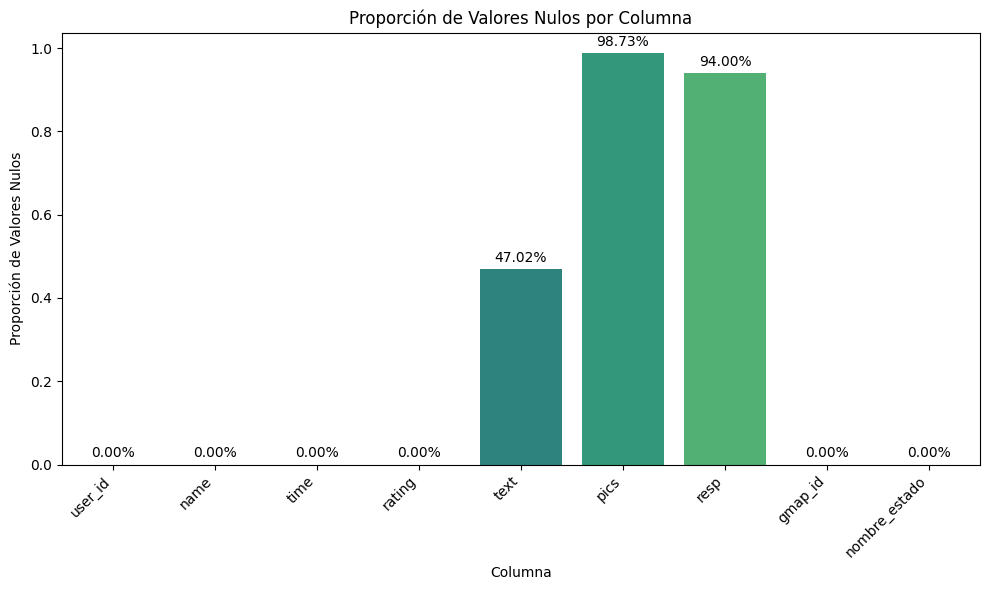

In [4]:
# Calcula la proporción de valores nulos para cada columna
proporcion_nulos = estados.isna().sum() / len(estados['user_id'])

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=proporcion_nulos.index, y=proporcion_nulos.values, palette='viridis')

# Anota los números en las barras
for i, valor in enumerate(proporcion_nulos.values):
    plt.text(i, valor + 0.01, f'{valor:.2%}', ha='center', va='bottom')


plt.title('Proporción de Valores Nulos por Columna')
plt.xlabel('Columna')
plt.ylabel('Proporción de Valores Nulos')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x
plt.tight_layout()  # Ajusta el diseño para evitar cortar las etiquetas
plt.show()

**Desempaquetar respuestas**

En esta sección convertiremos la columna respuesta en el formato apropiado para desempaquetar la información

In [5]:
import ast

def convertir_a_diccionario(texto):
    try:
        # Utilizar ast.literal_eval para convertir el texto en un diccionario
        return ast.literal_eval(texto)
    except (SyntaxError, ValueError):
        # Si hay un error al evaluar el texto, devolver un diccionario vacío
        return {}


estados['resp'] = pd.Series(estados['resp']).apply(lambda x:  convertir_a_diccionario(x))

La columna **resp** contiene un diccionario con la fecha y un texto de respuesta que una empresa ha contestado a un cliente. A continuación vamos a desempaquetar este diccionario para transformarlo en dos columnas llamadas resp_time y resp_text.

In [10]:

def obtener_resp_time(diccionario):
    return diccionario.get('time', None)

# Función para obtener el valor de 'text' de un diccionario
def obtener_resp_text(diccionario):
    return diccionario.get('text', None)

estados = pd.concat([estados.drop('resp', axis=1),
                    pd.Series(estados['resp'].apply(lambda x: obtener_resp_time(x)), name='resp_time'),
                    pd.Series(estados['resp'].apply(lambda x: obtener_resp_text(x)), name='resp_text')],
                    axis=1)

In [11]:
estados.drop(columns='pics',inplace=True)

**Verificación duplicados**

Podemos observar que existen registros duplicados, por lo que vamos a proceder a eliminarlos

In [12]:
estados[estados['time'] == 1629601310752]

,user_id,name,time,rating,text,gmap_id,nombre_estado,resp_time,resp_text
2,1.181066e+20,Thomas Landers,1629601310752,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
11,1.181066e+20,Thomas Landers,1629601310752,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None


In [13]:
estados[estados.duplicated()]

,user_id,name,time,rating,text,gmap_id,nombre_estado,resp_time,resp_text
9,1.064184e+20,Zipperand Stitch,1630361012730,3,"Food is good, but I really wish dine is was op...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
10,1.125366e+20,Chris Clark,1629164676460,3,Food is pretty good but if I order 30 minutes ...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
11,1.181066e+20,Thomas Landers,1629601310752,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
12,1.059758e+20,M.G. Sturm,1628951171309,1,"Tried get breakfast this Saturday, no one answ...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
13,1.089426e+20,Deborah pellem,1630122600565,5,This is a new one and it's close to home!❤️❤️,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,None
...,...,...,...,...,...,...,...,...,...
2839088,1.130978e+20,Robert Brown,1499454231602,4,"I came for my favorite dish, Super Potato Oles...",0x5335f00de3bbb2ff:0x429f4f841f6145ec,Wyoming_reviews,NaN,None
2839089,1.105319e+20,Tisha Barbula,1488736391076,4,Great food not much $$$,0x5335f00de3bbb2ff:0x429f4f841f6145ec,Wyoming_reviews,NaN,None
2839140,1.045800e+20,Jacob Granger,1502580982360,1,"Terrible pizza. Hardly any toppings, not much ...",0x5335f00d9c25d52b:0x60ea5d74df0230ef,Wyoming_reviews,NaN,None
2839172,1.082311e+20,Jane Kelly,1567703153907,5,Good and fast,0x5335f00d9c25d52b:0x60ea5d74df0230ef,Wyoming_reviews,NaN,None


In [14]:
estados.drop_duplicates(inplace=True)

**Verificación de Rating**

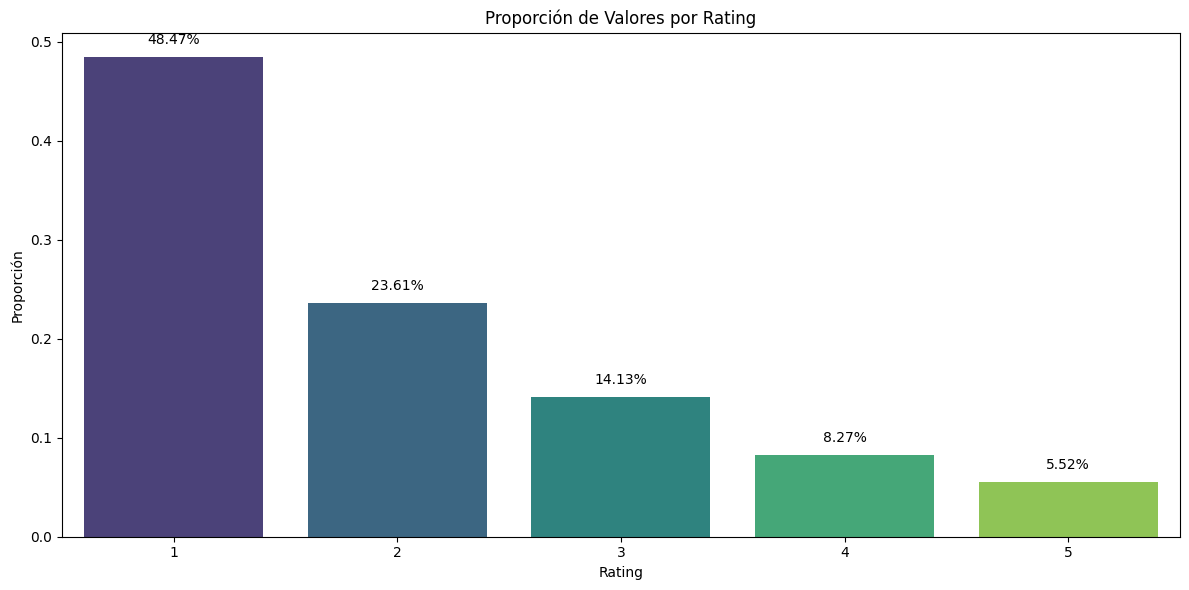

In [24]:
# Calcula la proporción por rating
proporcion_rating = estados['rating'].value_counts() / len(estados)

# Crea un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=[1,2,3,4,5], y=proporcion_rating.values, palette='viridis')

# Anota los números en las barras
for i, valor in enumerate(proporcion_rating.values):
    plt.text(i, valor + 0.01, f'{valor:.2%}', ha='center', va='bottom', rotation=0)

plt.title('Proporción de Valores por Rating')
plt.xlabel('Rating')
plt.ylabel('Proporción')
plt.xticks(rotation=0, ha='center')  # Ajusta la rotación de las etiquetas del eje x
plt.tight_layout()  # Ajusta el diseño para evitar cortar las etiquetas
plt.show()


**Converción de fechas**

La columan time contiene fechas en formato unix, a continuación vamos a transformar esta fecha en formato año mes dia.

In [25]:
from datetime import datetime

def convertir_fecha(x):
  if x!=0:
    timestamp_unix = x/ 1000  # Dividir por 1000 para convertir de milisegundos a segundos
    fecha = datetime.utcfromtimestamp(timestamp_unix)
    return(fecha.strftime('%Y-%m-%d %H:%M:%S'))
  else:
    return(None)

In [26]:
estados['fecha'] = estados['time'].apply(convertir_fecha)
estados['resp_fecha'] = estados['resp_time'].fillna(0).apply(convertir_fecha)
estados.drop(columns=['time','resp_time'],inplace=True)

In [28]:
estados['fecha_anho_mes'] = pd.to_datetime(estados['fecha']).dt.date
estados['anho'] = pd.to_datetime(estados['fecha']).dt.year

## Top 5 de negocion con mejores recomendaciones

In [150]:
estados[['nombre_estado','rating','user_id']].groupby(['nombre_estado','rating']).count()

user_id
nombre_estado   rating         
Alabama_reviews 1          4579
                2          3136
                3          7629
                4         12462
                5         22805
...                         ...
Wyoming_reviews 1           249
                2           205
                3           611
                4          1080
                5          1518

[255 rows x 1 columns]

In [130]:
estados[['nombre_estado','rating','user_id']].groupby(['nombre_estado','rating']).count().sort_values('user_id',ascending=False)

,,user_id
nombre_estado,rating,
Florida_reviews,5,111901
California_reviews,5,95370
Georgia_reviews,5,71769
Texas_reviews,5,69973
Illinois_reviews,5,57964
...,...,...
North_Dakota_reviews,2,223
Wyoming_reviews,2,205
District_of_Columbia_reviews,2,205


<AxesSubplot: xlabel='nombre_estado', ylabel='count'>

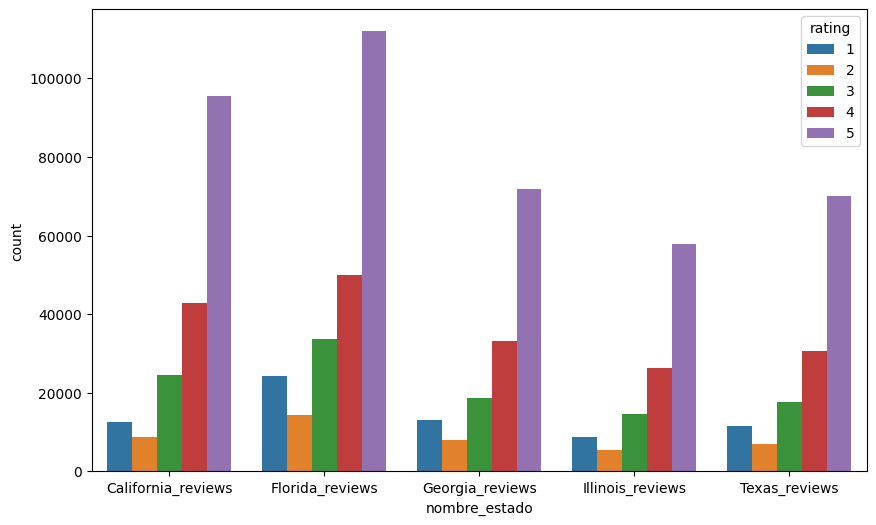

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt 

estados_top_5 = ['Florida_reviews','California_reviews','Georgia_reviews','Texas_reviews','Illinois_reviews']

mask = estados['nombre_estado'].isin(estados_top_5)


plt.figure(figsize=(10, 6))
sns.countplot(x='nombre_estado', hue='rating', data=estados[mask])

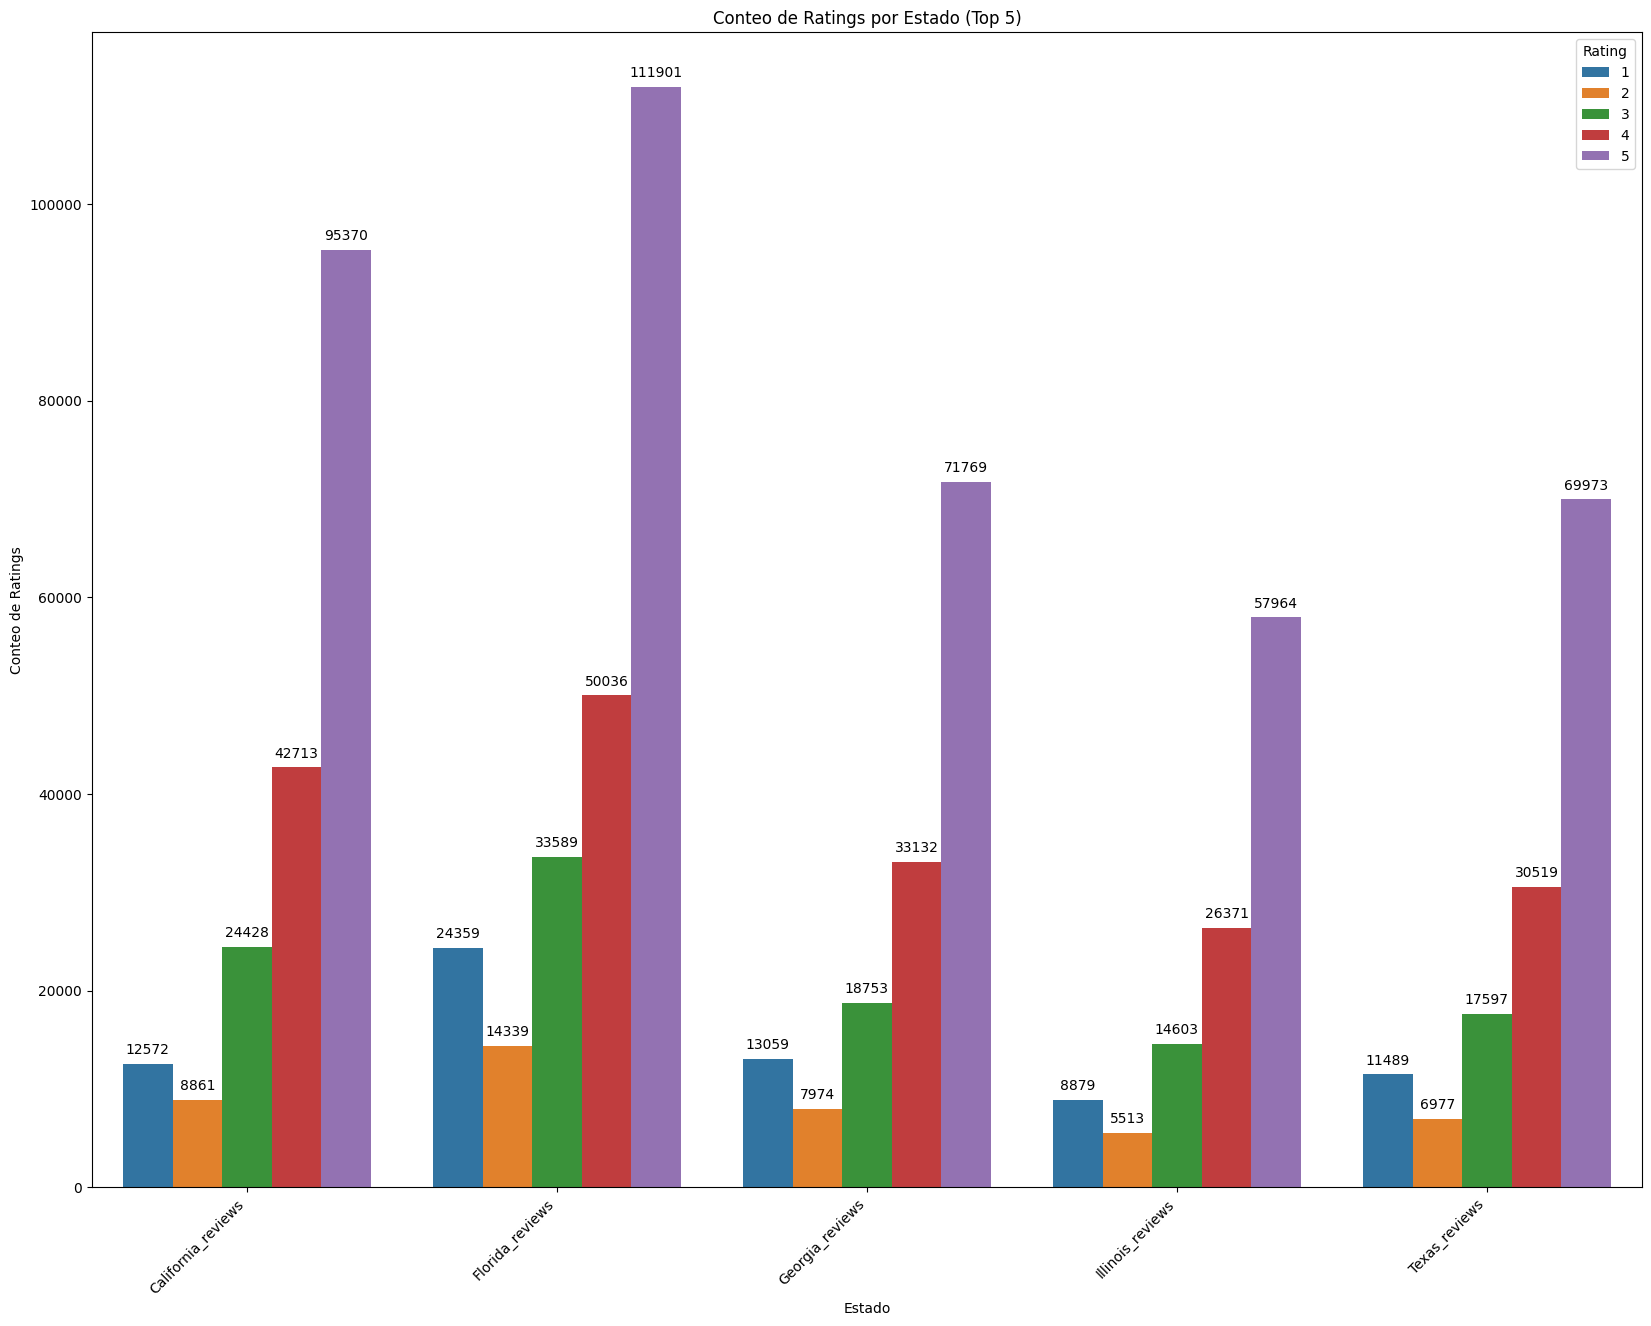

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

estados_top_5 = ['Florida_reviews', 'California_reviews', 'Georgia_reviews', 'Texas_reviews', 'Illinois_reviews']

mask = estados['nombre_estado'].isin(estados_top_5)

# Crea el gráfico de barras
plt.figure(figsize=(20, 15))
sns.countplot(x='nombre_estado', hue='rating', data=estados[mask])

# Agrega etiquetas horizontales a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=0)

plt.title('Conteo de Ratings por Estado (Top 5)')
plt.xlabel('Estado')
plt.xticks(rotation=45, ha='right')  
plt.ylabel('Conteo de Ratings')
plt.legend(title='Rating')
plt.show()


**Top 3 de usuarios con mayor cantidad de recomendaciones**

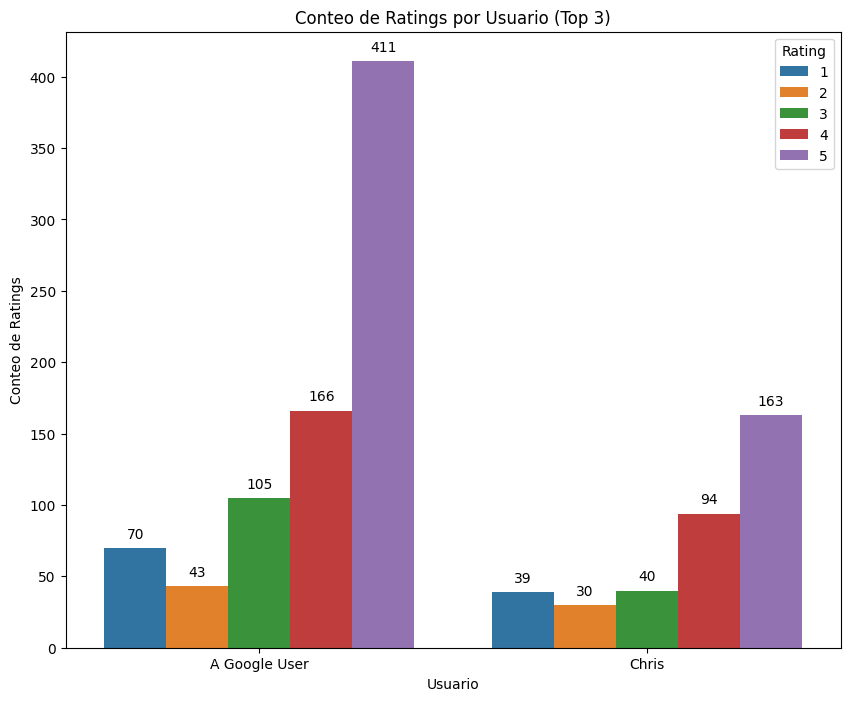

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

user_top_3 = ['A Google User', ' ', 'Chris']

mask = estados['name'].isin(user_top_3)

# Crea el gráfico de barras
plt.figure(figsize=(10, 8))
sns.countplot(x='name', hue='rating', data=estados[mask])

# Agrega etiquetas a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Conteo de Ratings por Usuario (Top 3)')
plt.xlabel('Usuario')
plt.ylabel('Conteo de Ratings')
plt.legend(title='Rating')
plt.show()


**Cantidad de rating por año**

In [83]:
estados[['fecha_anho_mes','rating','user_id']].groupby(['fecha_anho_mes','rating']).count().sort_values('user_id',ascending=False)

user_id
fecha_anho_mes rating         
2019-07-10     5          1968
2018-12-07     5          1748
2019-08-17     5          1730
2019-08-10     5          1711
2019-06-08     5          1707
...                        ...
2013-11-04     4             1
               2             1
2013-11-02     2             1
               1             1
2021-09-08     2             1

[16878 rows x 1 columns]

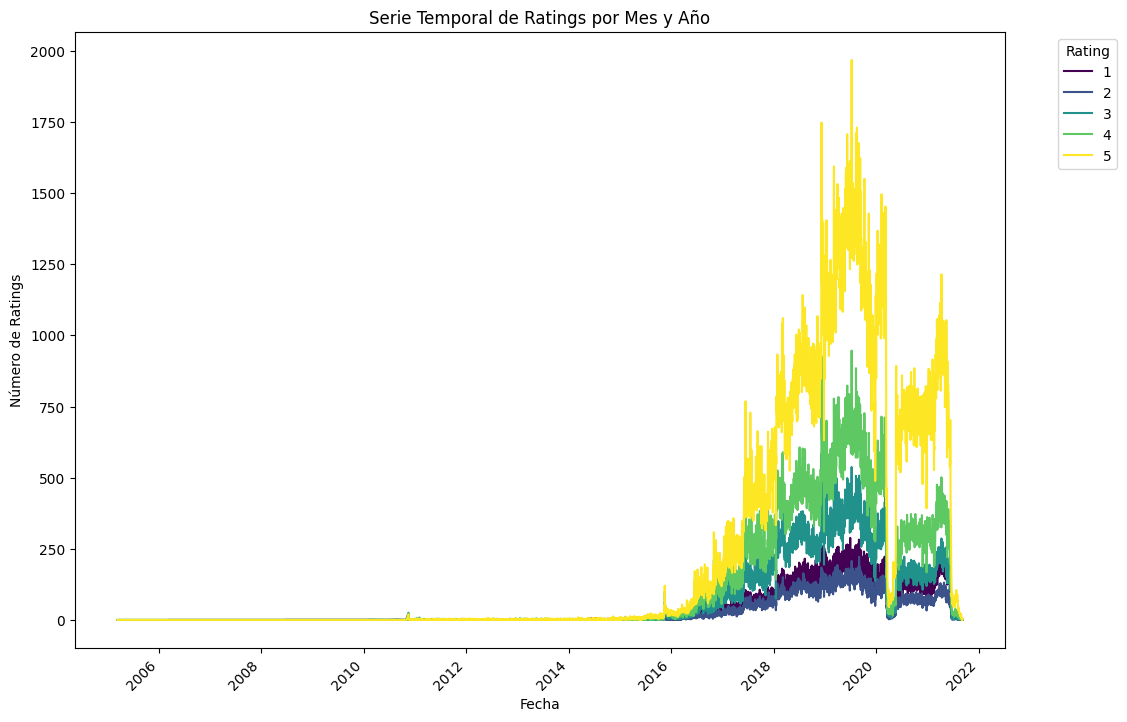

In [87]:

# Supongamos que ya tienes el DataFrame con la información proporcionada
data = estados[['fecha_anho_mes', 'rating', 'user_id']].groupby(['fecha_anho_mes', 'rating']).count().reset_index()

# Convierte 'fecha_anho_mes' a tipo datetime
data['fecha_anho_mes'] = pd.to_datetime(data['fecha_anho_mes'])

# Graficar el resultado como serie temporal
plt.figure(figsize=(12, 8))
sns.lineplot(x='fecha_anho_mes', y='user_id', hue='rating', data=data, palette='viridis')
plt.title('Serie Temporal de Ratings por Mes y Año')
plt.xlabel('Fecha')
plt.ylabel('Número de Ratings')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Ajusta la rotación de las etiquetas del eje x
plt.show()



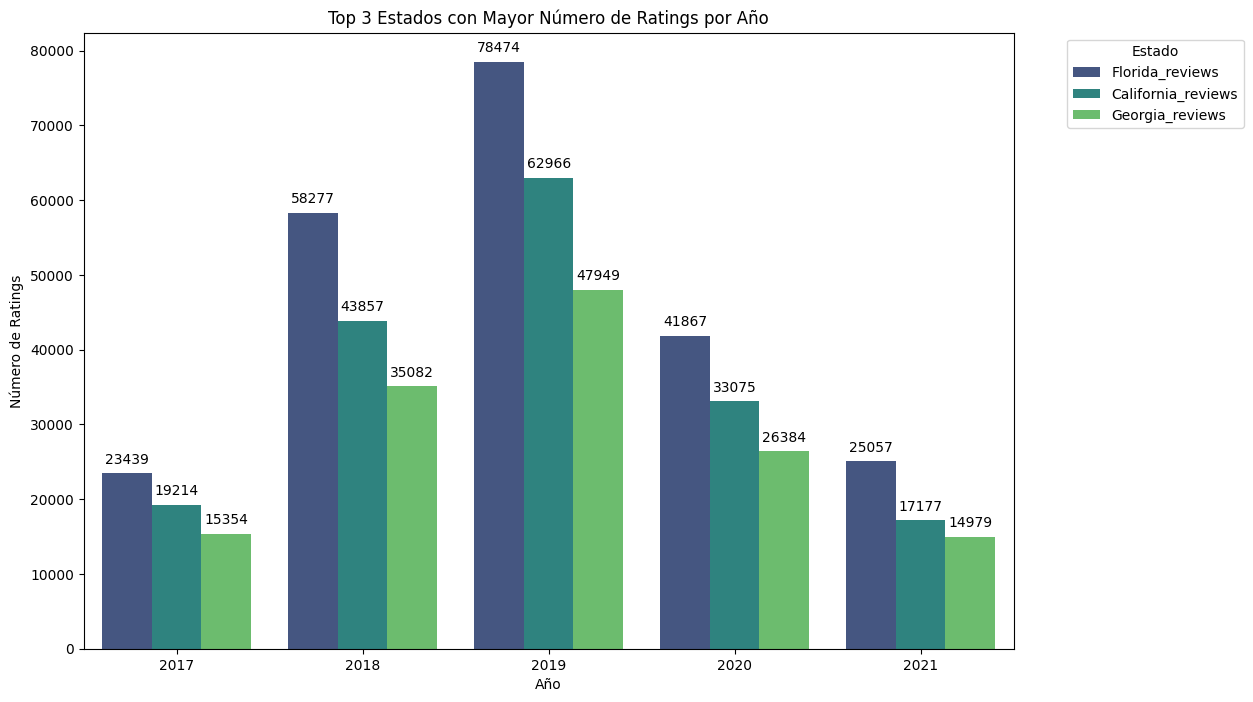

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes el DataFrame 'estados_top3' con la información proporcionada

# Encuentra el top 3 de estados con el máximo número de ratings para cada año
estados_top3 = estados.groupby(['anho', 'nombre_estado'])['rating'].count().reset_index()
estados_top3 = estados_top3.sort_values(['anho', 'rating'], ascending=[False, False])
estados_top3 = estados_top3.groupby('anho').head(3)

mask_anho = estados_top3['anho'] > 2016

# Graficar el resultado
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='anho', y='rating', hue='nombre_estado', data=estados_top3[mask_anho], palette='viridis')
plt.title('Top 3 Estados con Mayor Número de Ratings por Año')
plt.xlabel('Año')
plt.ylabel('Número de Ratings')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Agrega etiquetas a cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [259]:
estados

,user_id,name,rating,text,gmap_id,nombre_estado,resp_text,fecha,resp_fecha,fecha_anho_mes,anho
0,1.064184e+20,Zipperand Stitch,3,"Food is good, but I really wish dine is was op...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,None,2021-08-30 22:03:32,None,2021-08-30,2021
1,1.125366e+20,Chris Clark,3,Food is pretty good but if I order 30 minutes ...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,None,2021-08-17 01:44:36,None,2021-08-17,2021
2,1.181066e+20,Thomas Landers,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,None,2021-08-22 03:01:50,None,2021-08-22,2021
3,1.059758e+20,M.G. Sturm,1,"Tried get breakfast this Saturday, no one answ...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,None,2021-08-14 14:26:11,None,2021-08-14,2021
4,1.089426e+20,Deborah pellem,5,This is a new one and it's close to home!❤️❤️,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,None,2021-08-28 03:50:00,None,2021-08-28,2021
...,...,...,...,...,...,...,...,...,...,...,...
2840174,1.066896e+20,Nancy Schaffer,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,None,2017-11-30 02:54:03,None,2017-11-30,2017
2840175,1.019377e+20,Mackenzie Mayer,2,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,None,2018-06-30 01:26:11,None,2018-06-30,2018
2840176,1.087467e+20,Walter Orum,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,None,2017-04-05 14:12:00,None,2017-04-05,2017
2840177,1.124218e+20,Charissa Carver,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,None,2019-04-25 21:51:31,None,2019-04-25,2019


### Proximamente....

- SI existe la fecha de apertura o cierre y ...

- un diagrama de pie de lo siguiente

- grafico de geolocalización del top 5 de rating positivas y negativas


In [264]:
estados.isna().sum()/len(estados['user_id'])

user_id           0.000000
name              0.000004
rating            0.000000
text              0.487530
gmap_id           0.000000
nombre_estado     0.000000
resp_text         0.939935
fecha             0.000000
resp_fecha        0.939935
fecha_anho_mes    0.000000
anho              0.000000
dtype: float64

# Exportar data

In [262]:
estados.to_csv('../../data/google/estados.csv.gz', index=False, compression='gzip')

## Metadatos

- num_of_reviews, hemos comprobado que la cantidad de reviews es menor a la de esta columna

In [328]:
usecols = ['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating']

metadata = pd.read_csv('../../data/google/metadata.csv.gz',usecols=usecols)

estados = pd.read_csv('../../data/google/estados.csv.gz')

## Eliminacion de duplicados

In [329]:
metadata.drop_duplicates(inplace=True)

In [330]:
metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating
0,Maverik Adventure's First Stop,"Maverik Adventure's First Stop, 3330 S 500 W, ...",0x87528bb7ab938cb3:0x5ee996e34cc50715,NaN,40.698585,-111.906406,['Fuel supplier' 'Convenience store' 'Fast foo...,3.4
1,Pop's Express OB,"Pop's Express OB, 10047 MS-178, Olive Branch, ...",0x887f93d5418166af:0xbbce72cb50342df1,NaN,34.949467,-89.812309,['Fast food restaurant' 'Beer store' 'Convenie...,4.4
2,Dunkin',"Dunkin', 4008 Bell Blvd, Queens, NY 11361",0x89c261f60bdf13db:0x38da730e4687a97b,Long-running chain serving signature breakfast...,40.763985,-73.771430,['Coffee shop' 'Bagel shop' 'Bakery' 'Breakfas...,3.5
3,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",0x80c2d765f8c90a3d:0x16afb75943e7ad50,"American grub such as BBQ ribs, hamburgers, sa...",34.079995,-117.988951,['Hamburger restaurant' 'American restaurant' ...,3.7
4,Kennedy's Chicken & Sandwiches,"Kennedy's Chicken & Sandwiches, 495 E 138th St...",0x89c2f5c3caef3fb5:0xb7f855503b4bc974,NaN,40.808010,-73.919617,['Fast food restaurant'],3.7
...,...,...,...,...,...,...,...,...
28795,Agua Pura & Snack's,"Agua Pura & Snack's, 13669 Manning Ave #106, P...",0x8094fb3d40ce4ad9:0xfb24e5d4fb2159ce,NaN,36.604000,-119.546084,['Fast food restaurant' 'Crêperie' 'Ice cream ...,4.4
28796,Subway,"Subway, 620 N Cedar St Suite B, Mason, MI 48854",0x8822c54163af5d89:0x74cc4e15b662c024,Casual counter-serve chain for build-your-own ...,42.588522,-84.455860,['Sandwich shop' 'Caterer' 'Fast food restaura...,3.9
28797,Bojangles,"Bojangles, 501 S College St, Charlotte, NC 28202",0x8856a028f0b0a1e7:0x7ff78df2deab30,Southern-inspired fast-food chain known for Ca...,35.221936,-80.844894,['Restaurant' 'American restaurant' 'Chicken r...,3.6
28798,Little Caesars Pizza,"Little Caesars Pizza, 12040 Socorro Rd, San El...",0x86e7696ade0214c1:0x631386df8249de6d,"Carry-out chain featuring chicken wings, signa...",31.597720,-106.274376,['Pizza restaurant' 'American restaurant' 'Chi...,3.9


In [331]:
estados_metadata = estados.merge(metadata, on='gmap_id',how='left').rename(columns={'name_x':'user_name','name_y':'business_name'})

In [332]:
estados_metadata

,user_id,user_name,rating,text,gmap_id,nombre_estado,resp_text,fecha,resp_fecha,fecha_anho_mes,anho,business_name,address,description,latitude,longitude,category,avg_rating
0,1.064184e+20,Zipperand Stitch,3,"Food is good, but I really wish dine is was op...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,2021-08-30 22:03:32,NaN,2021-08-30,2021,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0
1,1.125366e+20,Chris Clark,3,Food is pretty good but if I order 30 minutes ...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,2021-08-17 01:44:36,NaN,2021-08-17,2021,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0
2,1.181066e+20,Thomas Landers,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,2021-08-22 03:01:50,NaN,2021-08-22,2021,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0
3,1.059758e+20,M.G. Sturm,1,"Tried get breakfast this Saturday, no one answ...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,2021-08-14 14:26:11,NaN,2021-08-14,2021,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0
4,1.089426e+20,Deborah pellem,5,This is a new one and it's close to home!❤️❤️,0x886243f0a950225d:0x1368e71fd73bd654,Alabama_reviews,NaN,2021-08-28 03:50:00,NaN,2021-08-28,2021,Taco Bell,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732479,1.066896e+20,Nancy Schaffer,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,NaN,2017-11-30 02:54:03,NaN,2017-11-30,2017,Dairy Queen Store,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2
2732480,1.019377e+20,Mackenzie Mayer,2,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,NaN,2018-06-30 01:26:11,NaN,2018-06-30,2018,Dairy Queen Store,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2
2732481,1.087467e+20,Walter Orum,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,NaN,2017-04-05 14:12:00,NaN,2017-04-05,2017,Dairy Queen Store,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2
2732482,1.124218e+20,Charissa Carver,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming_reviews,NaN,2019-04-25 21:51:31,NaN,2019-04-25,2019,Dairy Queen Store,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2


## negoción con mayor cantidad de reviews

In [333]:
estados_metadata[['gmap_id','latitude']].groupby('gmap_id').count().reset_index().sort_values('latitude',ascending=False)

,gmap_id,latitude
720,0x54901163628e5f57:0x6ab7c110ebacce6e,3323
784,0x54905555927ef741:0xccfedcce4510f66e,3123
1337,0x54d2933392892c65:0xb8d8387f93559e3e,2801
4877,0x874d819ebf6304bd:0x78efb8b77884f88b,2696
1884,0x80952f486d09a2cd:0xe98613b3067f324b,2685
...,...,...
16570,0x89c259a9b55adb77:0xfe5e87207e736efc,5
14626,0x88fbcd4789c8fb8b:0xe4f25fff23a3ed38,5
16090,0x89baea4d3fdbf3c7:0xc44ab9a872056af0,5
19628,0x89e44489cbeccc03:0xd3b75bf4e9a39824,5


In [352]:
estados_metadata[['user_id','gmap_id','user_name']].groupby(['user_id','user_name']).count().sort_values('gmap_id', ascending=False)

gmap_id
user_id      user_name                  
1.127651e+20 nex7 Miles7one           53
1.099385e+20 Santos Mesa              49
1.020920e+20 Jonathan Yammarino       35
1.128555e+20 Chuck Tenny              33
1.130895e+20 Rick Phillips            32
...                                  ...
1.069612e+20 Sharesa Coleman           1
             Tim Whealdon              1
             mike carman               1
             Ashley Garrison           1
1.184467e+20 C.D- MACK                 1

[2037770 rows x 1 columns]

In [354]:
estados_metadata[['user_name','gmap_id']].groupby(['user_name']).count().sort_values('gmap_id', ascending=False)

,gmap_id
user_name,
A Google User,795
Chris,366
Mike,329
David,314
John,312
...,...
Jennifer&Jimmy Manning,1
Jennifer “mOnKeYy5312” Medina,1
Jennifer “jenny” Diaz,1


In [368]:
estados_metadata['nombre_estado'] = estados_metadata['nombre_estado'].apply(lambda x: x[:-8])

In [369]:
estados_metadata['nombre_estado'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District_of_Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New_Hampshire',
       'New_Jersey', 'New_Mexico', 'New_York', 'North_Carolina',
       'North_Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode_Island', 'South_Carolina', 'South_Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West_Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

## Información demografica

In [396]:
info_estados = pd.read_csv('../../data/google/info_estados.csv', sep=';')
info_estados


,nombre_estado,poblacion,PBI_pc,area_kms,ingreso_medio
0,Alabama,4.903.185,49238,5242,49551
1,Alaska,731.158,77490,1723337,82263
2,Arizona,7.278.717,57191,295234,59700
3,Arkansas,3.017.804,48458,137732,49970
4,California,39.512.223,80680,42397,80440
5,Colorado,5.758.736,67914,269601,71233
6,Connecticut,3.565.287,78174,14357,85931
7,Delaware,973.764,69860,6447,74666
8,Florida,21.477.737,59443,170312,59227
9,Georgia,10.617.423,58619,15391,58219


In [398]:
info_estados['nombre_estado'] = info_estados['nombre_estado'].str.replace(' ','_')

In [400]:
estados_metadata_info_estados = estados_metadata.merge(info_estados,on='nombre_estado')

In [401]:
estados_metadata_info_estados

,user_id,user_name,rating,text,gmap_id,nombre_estado,resp_text,fecha,resp_fecha,fecha_anho_mes,...,address,description,latitude,longitude,category,avg_rating,poblacion,PBI_pc,area_kms,ingreso_medio
0,1.064184e+20,Zipperand Stitch,3,"Food is good, but I really wish dine is was op...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama,NaN,2021-08-30 22:03:32,NaN,2021-08-30,...,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0,4.903.185,49238,5242,49551
1,1.125366e+20,Chris Clark,3,Food is pretty good but if I order 30 minutes ...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,NaN,2021-08-17 01:44:36,NaN,2021-08-17,...,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0,4.903.185,49238,5242,49551
2,1.181066e+20,Thomas Landers,5,One of the best Taco Bell’s I have been too. H...,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,NaN,2021-08-22 03:01:50,NaN,2021-08-22,...,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0,4.903.185,49238,5242,49551
3,1.059758e+20,M.G. Sturm,1,"Tried get breakfast this Saturday, no one answ...",0x886243f0a950225d:0x1368e71fd73bd654,Alabama,NaN,2021-08-14 14:26:11,NaN,2021-08-14,...,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0,4.903.185,49238,5242,49551
4,1.089426e+20,Deborah pellem,5,This is a new one and it's close to home!❤️❤️,0x886243f0a950225d:0x1368e71fd73bd654,Alabama,NaN,2021-08-28 03:50:00,NaN,2021-08-28,...,"Taco Bell, 5809 AL-53, Harvest, AL 35749",NaN,34.843859,-86.711656,['Fast food restaurant' 'Breakfast restaurant'...,3.0,4.903.185,49238,5242,49551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732479,1.066896e+20,Nancy Schaffer,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,NaN,2017-11-30 02:54:03,NaN,2017-11-30,...,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2,578.759,60787,253335,65003
2732480,1.019377e+20,Mackenzie Mayer,2,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,NaN,2018-06-30 01:26:11,NaN,2018-06-30,...,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2,578.759,60787,253335,65003
2732481,1.087467e+20,Walter Orum,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,NaN,2017-04-05 14:12:00,NaN,2017-04-05,...,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2,578.759,60787,253335,65003
2732482,1.124218e+20,Charissa Carver,5,NaN,0x5335fac0b65b4243:0x78f735c40c344b01,Wyoming,NaN,2019-04-25 21:51:31,NaN,2019-04-25,...,"Dairy Queen Store, 544 N Main St, Sheridan, WY...",Soft-serve ice cream & signature shakes top th...,44.803510,-106.956017,['Fast food restaurant' 'Ice cream shop'],4.2,578.759,60787,253335,65003
